In [1]:
import pandas as pd
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')

In [2]:
titanic=pd.read_csv("titanic_toy.csv")
titanic.sample(3)

,Age,Fare,Family,Survived
601,NaN,7.8958,0,0
438,64.0,263.0000,5,0
497,NaN,15.1000,0,0


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [4]:
titanic.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [5]:
#Since our age and fare feature consists of null values, I'll just try to mean or median impute those missing values.
mean_age1=titanic['Age'].mean()
median_age1=titanic['Age'].median()
print(mean_age1,median_age1)

29.69911764705882 28.0


In [6]:
X=titanic.drop(columns=['Survived'])
Y=titanic['Survived']

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [8]:
X_train.isnull().mean()

Age       0.181380
Fare      0.054575
Family    0.000000
dtype: float64

In [9]:
#Mean and Median for Age:
mean_age2=X_train['Age'].mean()
median_age2=X_train['Age'].median()
print(mean_age2,median_age2)

29.679254901960785 28.0


In [10]:
#Mean and Median for Fare:
mean_age3=X_train['Fare'].mean()
median_age3=X_train['Fare'].median()
print(mean_age2,median_age2)

29.679254901960785 28.0


In [11]:
#Imputation in the Age column
X_train['mean_fare']=X_train['Fare'].fillna(mean_age3)
X_train['median_fare']=X_train['Fare'].fillna(median_age3)

X_train['mean_age']=X_train['Age'].fillna(mean_age2)
X_train['median_age']=X_train['Age'].fillna(median_age2)

X_train

,Age,Fare,Family,mean_fare,median_fare,mean_age,median_age
7,2.0,21.0750,4,21.0750,21.0750,2.000000,2.0
765,51.0,77.9583,1,77.9583,77.9583,51.000000,51.0
339,45.0,35.5000,0,35.5000,35.5000,45.000000,45.0
374,3.0,21.0750,4,21.0750,21.0750,3.000000,3.0
183,1.0,39.0000,3,39.0000,39.0000,1.000000,1.0
...,...,...,...,...,...,...,...
369,24.0,69.3000,0,69.3000,69.3000,24.000000,24.0
320,22.0,7.2500,0,7.2500,7.2500,22.000000,22.0
527,NaN,221.7792,0,221.7792,221.7792,29.679255,28.0
125,12.0,11.2417,1,11.2417,11.2417,12.000000,12.0


In [12]:
print("Age")
print("Original Varaince is:",X_train['Age'].var())
print("Varaince after mean imputation is:",X_train['mean_age'].var())
print("Varaince after median imputation is",X_train['median_age'].var())
print("-"*60)
print("Fare")
print("Original Varaince is:",X_train['Fare'].var())
print("Varaince after mean imputation is:",X_train['mean_fare'].var())
print("Varaince after median imputation is",X_train['median_fare'].var())

Age
Original Varaince is: 207.08796015100756
Varaince after mean imputation is: 169.46587092743223
Varaince after median imputation is 169.8852467966947
------------------------------------------------------------
Fare
Original Varaince is: 2839.8622112045305
Varaince after mean imputation is: 2684.6285855116785
Varaince after median imputation is 2702.8910874700514


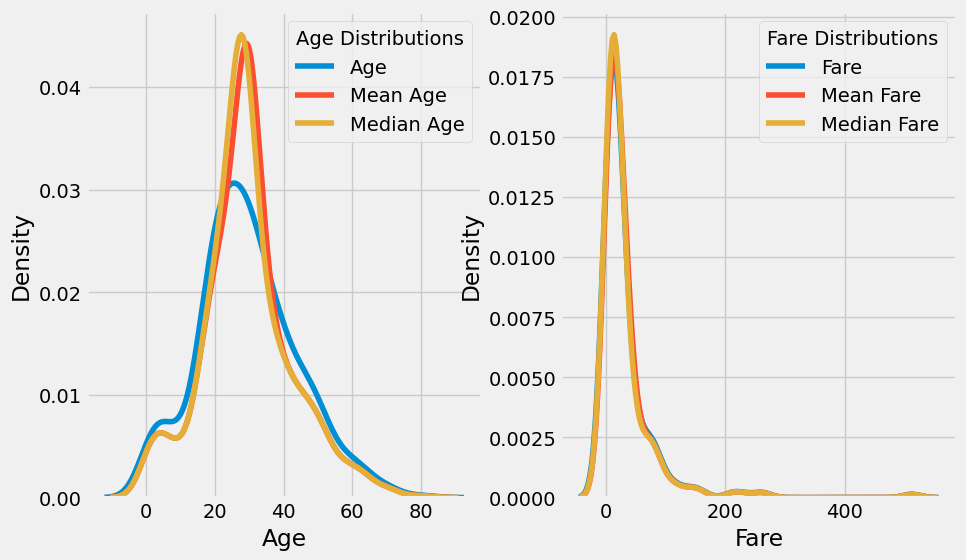

In [24]:
import seaborn as sns
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))

sns.kdeplot(data=X_train,x=X_train['Age'],ax=ax[0],label="Age")
sns.kdeplot(data=X_train,x=X_train['mean_age'],ax=ax[0],label="Mean Age")
sns.kdeplot(data=X_train,x=X_train['median_age'],ax=ax[0],label="Median Age")
ax[0].legend(title="Age Distributions")

sns.kdeplot(data=X_train,x=X_train['Fare'],ax=ax[1],label="Fare")
sns.kdeplot(data=X_train,x=X_train['mean_fare'],ax=ax[1],label="Mean Fare")
sns.kdeplot(data=X_train,x=X_train['median_fare'],ax=ax[1],label="Median Fare")
ax[1].legend(title="Fare Distributions")

plt.show()

In [25]:
X_train.cov()

,Age,Fare,Family,mean_fare,median_fare,mean_age,median_age
Age,207.087960,97.431989,-5.964544,91.445559,89.665343,207.087960,207.087960
Fare,97.431989,2839.862211,17.562666,2839.862211,2839.862211,79.159506,82.689709
Family,-5.964544,17.562666,2.771193,16.602649,16.539972,-4.880953,-4.842866
mean_fare,91.445559,2839.862211,16.602649,2684.628586,2684.628586,74.832459,78.169693
median_fare,89.665343,2839.862211,16.539972,2684.628586,2702.891087,73.375659,76.602917
mean_age,207.087960,79.159506,-4.880953,74.832459,73.375659,169.465871,169.465871
median_age,207.087960,82.689709,-4.842866,78.169693,76.602917,169.465871,169.885247


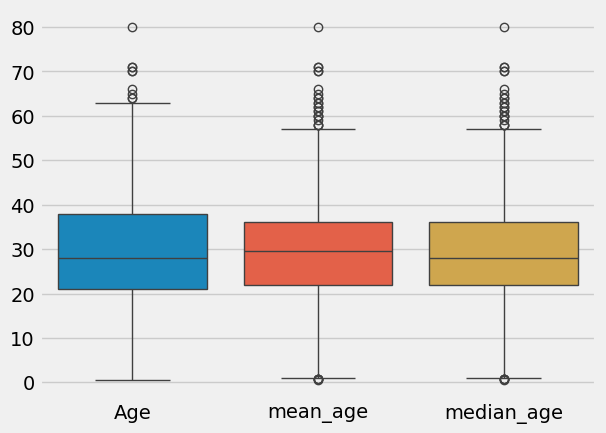

In [28]:
sns.boxplot(X_train[['Age','mean_age','median_age']])

plt.show()

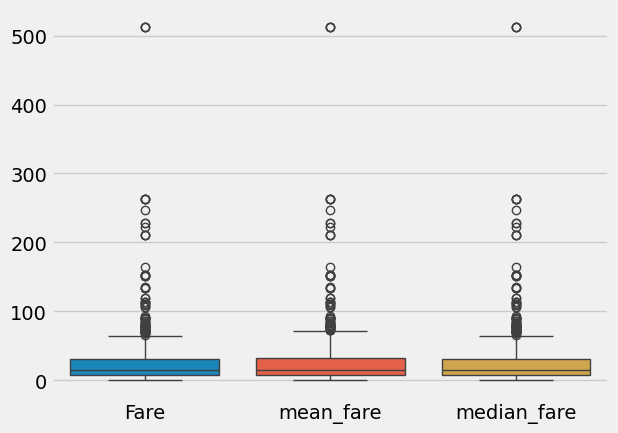

In [29]:
sns.boxplot(X_train[['Fare','mean_fare','median_fare']])

plt.show()

**Important Points**
1. If we have more than 5% missing values, then removing the values might not be a solution. Thus, for numerical columns we can either do mean or median imputation. While doing this there are a lot of things that we should take into consideration. Here, I have imputed the missing values of two columns: Age and Fare and I'll discuss my observations below.
2. For the Age column, doing either mean or median imputation resulted in a drastic change in distribution. Moreover, since we imputed with mean most of the values were very close to the mean or median thus the varaince also shrinked a lot. Also, plotting a boxplot after the imputation shows that we have more outliers after we either mean or median imputed. Thus, it might not be a wise decision to consider mean/median imputation for this case.
3. For the Fare column, the variance shrinked but not by much. Moreover, using the Kde plot we can see that there is not much change in the distribution of the fare and the boxplot also shows that the number of outliers riughly remain the same. Thus, considering mean/median imputation is safe here.